In [154]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

%config InlineBackend.figure_format = 'svg'

%matplotlib inline

In [155]:
Stations_locations = pd.read_pickle('Stations_W_Data.pkl')

In [156]:
census_info = pd.read_pickle('censusA.pkl')
census_info = census_info.drop(['STATEFP','COUNTYFP','TRACTCE','MTFCC','FUNCSTAT','ALAND','AWATER','INTPTLAT','INTPTLON'], axis = 1)
census_info = census_info.dropna(how = 'any')
census_info

,GEOID,NAME_x,NAMELSAD,geometry,NAME_y,Total Population - 25 years and over,Total Population - 25 years and over - Advanced Degrees,Median Income - 25 years and over,Female Population Ratio,Total Female Population - 25 years and over,Total Female Population - 25 years and over - w/ advanced degree
0,36061000700,7,Census Tract 7,"POLYGON ((-74.01251 40.70677, -74.01195 40.707...","Census Tract 7, New York County, New York",6468,5803,113125,0.544959,3524,2935
1,36061021500,215,Census Tract 215,"POLYGON ((-73.95151 40.81201, -73.95093 40.812...","Census Tract 215, New York County, New York",3013,912,39357,0.503525,1517,463
2,36061025900,259,Census Tract 259,"POLYGON ((-73.94460 40.82146, -73.94405 40.822...","Census Tract 259, New York County, New York",2711,1571,46972,0.539957,1463,802
3,36061023801,238.01,Census Tract 238.01,"POLYGON ((-73.96159 40.74982, -73.96071 40.751...","Census Tract 238.01, New York County, New York",5214,3672,77782,0.515198,2686,2134
4,36061031703,317.03,Census Tract 317.03,"POLYGON ((-74.02373 40.71389, -74.02339 40.715...","Census Tract 317.03, New York County, New York",3765,3103,157464,0.499750,1881,1521
...,...,...,...,...,...,...,...,...,...,...,...
283,36061015002,150.02,Census Tract 150.02,"POLYGON ((-73.95992 40.78221, -73.95947 40.782...","Census Tract 150.02, New York County, New York",3777,3422,112417,0.561798,2121,1851
284,36061015200,152,Census Tract 152,"POLYGON ((-73.94751 40.77944, -73.94705 40.780...","Census Tract 152, New York County, New York",5939,3999,77879,0.610128,3623,2286
285,36061019100,191,Census Tract 191,"POLYGON ((-73.97989 40.80418, -73.97876 40.805...","Census Tract 191, New York County, New York",7806,5124,90201,0.512821,4003,2577
286,36061031900,319,Census Tract 319,"POLYGON ((-74.02540 40.70474, -74.01976 40.704...","Census Tract 319, New York County, New York",0,0,0,1.000000,0,0


In [157]:
# Set both file's crs equal to 3857 the MERCATOR coordinates that contextily uses to visualize the base maps
census_info = census_info.to_crs(epsg=3857)
Stations_locations = Stations_locations.to_crs(epsg=3857)

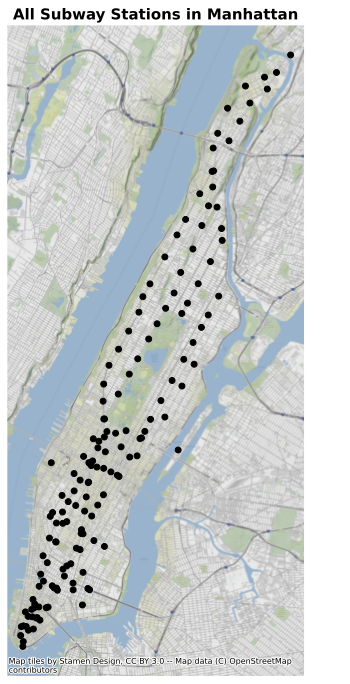

In [158]:
# This map wasn't used in the presentation but was the initial test map for the code

ax = Stations_locations.plot(figsize = (12,12), color='black', zorder=1);
plt.title('All Subway Stations in Manhattan', fontsize = 15, weight = "bold", color='black')
#filterfor10.plot(ax=ax, figsize = (12,12), color='black', alpha=1, zorder=2)
plt.axis('off')
ctx.add_basemap(ax, zoom = 15)

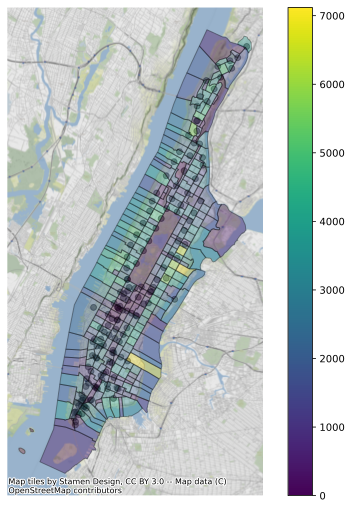

In [159]:
ax = census_info.plot(column = 'Total Female Population - 25 years and over', alpha = 0.35 , edgecolor = 'black', figsize = (9, 9), zorder=3, legend=True);
#plt.title('Total Female Population - 25 years and over', fontsize = 15, weight = "bold", color='black')
plt.axis('off')
Stations_locations.plot(ax=ax, figsize = (12,12), color='black', alpha=.4, zorder=1);
ctx.add_basemap(ax, zoom = 15);
plt.savefig('Total Female Population - 25 years and over.svg')

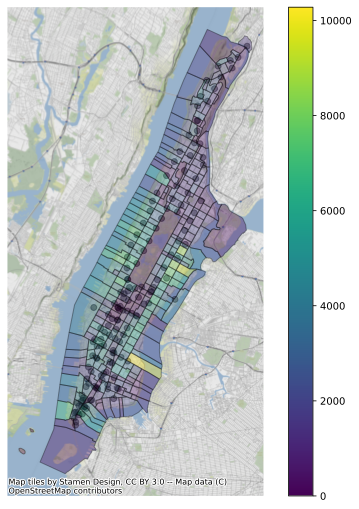

In [160]:
ax = census_info.plot(column = 'Total Population - 25 years and over - Advanced Degrees', alpha = 0.35 , edgecolor = 'black', figsize = (9, 9), zorder=3, legend=True);
#plt.title('Total Population - 25 years and over - Advanced Degrees by Census Tract', fontsize = 15, weight = "bold", color='black')
plt.axis('off')
Stations_locations.plot(ax=ax, figsize = (12,12), color='black', alpha=.4, zorder=1);
ctx.add_basemap(ax, zoom = 15);
plt.savefig('Total Population - 25 years and over - Advanced Degrees.svg')

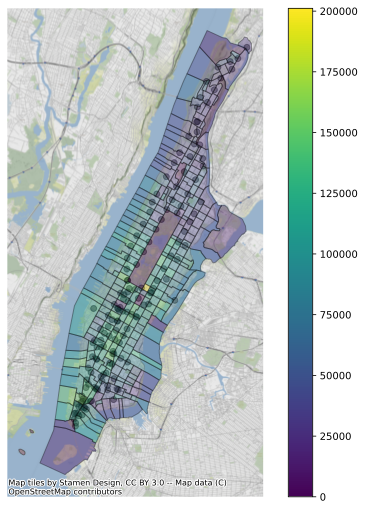

In [161]:
ax = census_info.plot(column = 'Median Income - 25 years and over', alpha = 0.35 , edgecolor = 'black', figsize = (9, 9), zorder=3, legend=True);
#plt.title('Total Population - 25 years and over - Advanced Degrees by Census Tract', fontsize = 15, weight = "bold", color='black')
plt.axis('off')
Stations_locations.plot(ax=ax, figsize = (12,12), color='black', alpha=.4, zorder=1);
ctx.add_basemap(ax, zoom = 15);
plt.savefig('Median Income - 25 years and over.svg')